In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import SGDClassifier, LogisticRegression
# from sklearn.metrics import plot_roc_curve, recall_score, precision_score, roc_curve, roc_auc_score, balanced_accuracy_score
# import matplotlib.pyplot as plt
# import matplotlib as mpl

In [2]:
df = pd.read_csv("data/all_data.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(37399, 161)


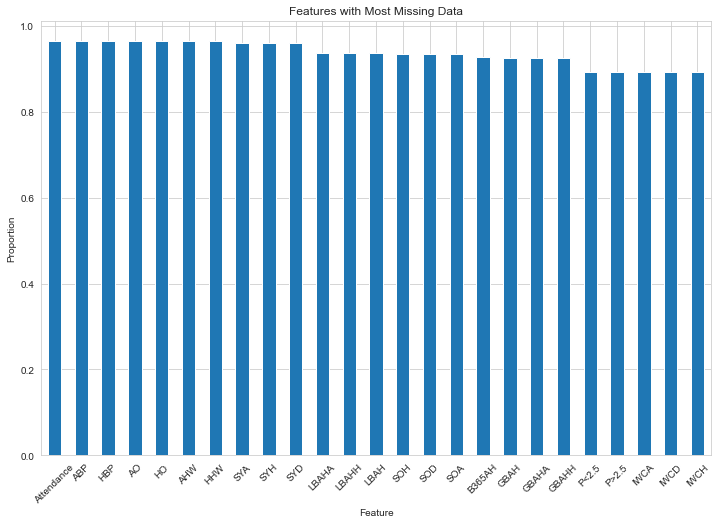

In [3]:
# remove unknown columns
columns = df.columns
unknown_cols = [c for c in columns if "Unnamed" in c]
df = df.drop(columns=unknown_cols)

# remove rows with only na values
df = df.dropna(how="all")
print(df.shape)

sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
missing_vals = df.isna().sum()/df.shape[0]
missing_vals = missing_vals.sort_values(ascending=False)[:25]
ax = missing_vals.plot(kind='bar')

ax.set_title('Features with Most Missing Data')
ax.set_ylabel('Proportion')
ax.set_xlabel('Feature')
ax.tick_params(axis='x', rotation=45)

plt.savefig("missing_features_original.pdf")

features_to_keep = ["Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR", "HS", "AS", "HST", "AST", 
                    "B365H", "B365D", "B365A",
                    "IWH", "IWD", "IWA",
                    "WHH", "WHD", "WHA"]
df = df[features_to_keep]

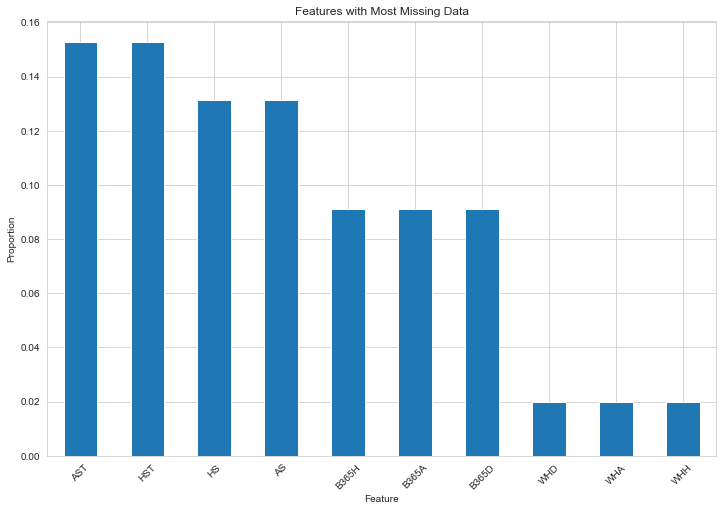

In [4]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
missing_vals = df.isna().sum()/df.shape[0]
missing_vals = missing_vals.sort_values(ascending=False)[:10]
ax = missing_vals.plot(kind='bar')

ax.set_title('Features with Most Missing Data')
ax.set_ylabel('Proportion')
ax.set_xlabel('Feature')
ax.tick_params(axis='x', rotation=45)

plt.savefig("missing_features.pdf")

In [5]:
df.loc[(df['HomeTeam'] == "Arsenal") | (df['AwayTeam'] == "Arsenal")]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,B365H,B365D,B365A,IWH,IWD,IWA,WHH,WHD,WHA
55,2000-08-19,Sunderland,Arsenal,1.0,0.0,H,8.0,14.0,2.0,7.0,NaN,NaN,NaN,2.90,2.90,2.10,3.75,3.00,1.90
64,2000-08-21,Arsenal,Liverpool,2.0,0.0,H,17.0,7.0,12.0,4.0,NaN,NaN,NaN,2.10,2.90,2.90,2.10,3.00,3.20
73,2000-08-26,Arsenal,Charlton,5.0,3.0,H,18.0,7.0,9.0,4.0,NaN,NaN,NaN,1.35,3.80,6.20,1.33,3.75,9.00
104,2000-09-06,Chelsea,Arsenal,2.0,2.0,D,12.0,13.0,5.0,5.0,NaN,NaN,NaN,2.20,2.90,2.70,2.20,3.00,3.00
124,2000-09-09,Bradford,Arsenal,1.0,1.0,D,9.0,18.0,5.0,11.0,NaN,NaN,NaN,3.80,3.10,1.70,4.50,3.50,1.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37137,2021-09-18,Burnley,Arsenal,0.0,1.0,A,18.0,13.0,3.0,3.0,3.80,3.60,1.95,3.70,3.50,2.05,3.80,3.40,2.00
37230,2021-09-26,Arsenal,Tottenham,3.0,1.0,H,12.0,10.0,7.0,4.0,2.15,3.30,3.50,2.25,3.25,3.35,2.25,3.25,3.30
37259,2021-10-02,Brighton,Arsenal,0.0,0.0,D,21.0,8.0,2.0,2.0,3.00,3.25,2.40,3.00,3.15,2.50,3.00,3.10,2.45
37347,2021-10-18,Arsenal,Crystal Palace,2.0,2.0,D,17.0,9.0,6.0,6.0,1.60,3.80,6.00,1.65,3.85,5.50,1.62,3.70,5.80


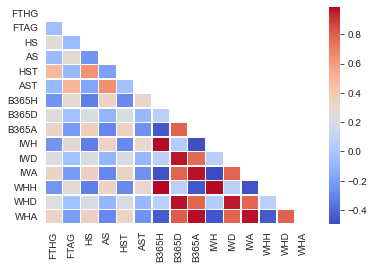

In [6]:
import seaborn as sns
corr = df.corr()
matrix = np.triu(corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidths=.5,
            cmap="coolwarm",
           mask=matrix)
plt.savefig("corr.pdf")

[0.46027968662263696, 0.2602743388860665, 0.27944597449129654]


,FTHG,FTAG,HS,AS,HST,AST,B365H,B365D,B365A,IWH,IWD,IWA,WHH,WHD,WHA
count,37399.000000,37399.000000,32486.000000,32486.000000,31680.000000,31680.000000,33987.000000,33987.000000,33987.000000,37234.000000,37234.000000,37234.000000,36663.000000,36663.000000,36663.000000
mean,1.528303,1.141715,13.695838,10.952687,5.331976,4.201105,2.588274,3.772761,4.582197,2.438889,3.572372,4.134649,2.518455,3.605906,4.433492
std,1.280323,1.123800,5.128629,4.526305,2.867606,2.475498,1.745133,1.162664,3.633327,1.424594,0.907678,2.840388,1.639820,0.999046,3.476963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.020000,1.400000,1.070000,1.030000,1.500000,1.100000,1.020000,1.020000,1.080000
25%,1.000000,0.000000,10.000000,8.000000,3.000000,2.000000,1.670000,3.200000,2.600000,1.700000,3.100000,2.600000,1.670000,3.100000,2.600000
50%,1.000000,1.000000,13.000000,10.000000,5.000000,4.000000,2.100000,3.400000,3.500000,2.100000,3.300000,3.300000,2.100000,3.300000,3.400000
75%,2.000000,2.000000,17.000000,14.000000,7.000000,6.000000,2.750000,3.800000,5.000000,2.600000,3.700000,4.600000,2.620000,3.700000,5.000000
max,10.000000,9.000000,44.000000,39.000000,24.000000,20.000000,26.000000,21.000000,51.000000,20.000000,16.000000,42.000000,26.000000,19.000000,51.000000


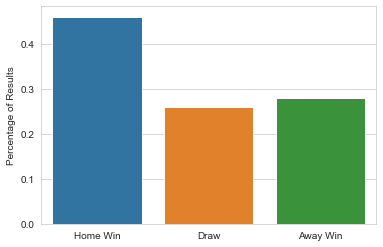

In [11]:
total_games = df["FTR"].count()
result_percentage = df["FTR"].value_counts() / total_games
keys = ["H", "D", "A"]
vals = list(result_percentage[k] for k in keys)
print(vals)
ax = sns.barplot(x=["Home Win", "Draw", "Away Win"], y=vals)
ax.set(ylabel='Percentage of Results')
plt.savefig("baseline.pdf")

df.describe()